In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [3]:
DATA_PATH = 'D:\Github\Infrared-Solar-Modules-Classifier\Data/2020-02-14_InfraredSolarModules'
METADATA_PATH = os.path.join(DATA_PATH, 'module_metadata.json')

In [4]:
df = pd.read_json(METADATA_PATH, orient='index').sort_index()
df['image_filepath'] = df.image_filepath.apply(lambda x: os.path.join(DATA_PATH, x))
df

,image_filepath,anomaly_class
0,D:\Github\Infrared-Solar-Modules-Classifier\Da...,Offline-Module
1,D:\Github\Infrared-Solar-Modules-Classifier\Da...,Offline-Module
2,D:\Github\Infrared-Solar-Modules-Classifier\Da...,Offline-Module
3,D:\Github\Infrared-Solar-Modules-Classifier\Da...,Offline-Module
4,D:\Github\Infrared-Solar-Modules-Classifier\Da...,Offline-Module
...,...,...
19995,D:\Github\Infrared-Solar-Modules-Classifier\Da...,No-Anomaly
19996,D:\Github\Infrared-Solar-Modules-Classifier\Da...,No-Anomaly
19997,D:\Github\Infrared-Solar-Modules-Classifier\Da...,No-Anomaly
19998,D:\Github\Infrared-Solar-Modules-Classifier\Da...,No-Anomaly


There's a class imbalance in the data.
But only between anomalies.

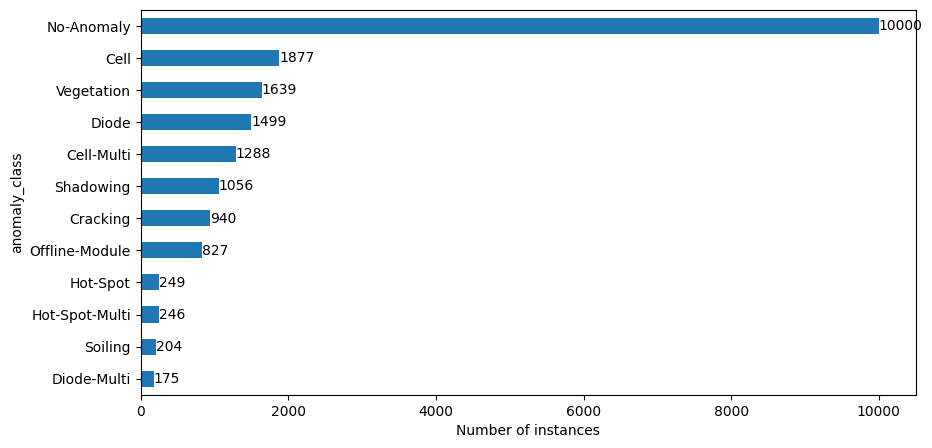

In [5]:
ax = df.anomaly_class.value_counts().sort_values(ascending=True).plot.barh(figsize=(10,5))
ax.bar_label(ax.containers[0])
ax.set_xlabel('Number of instances')
plt.show()

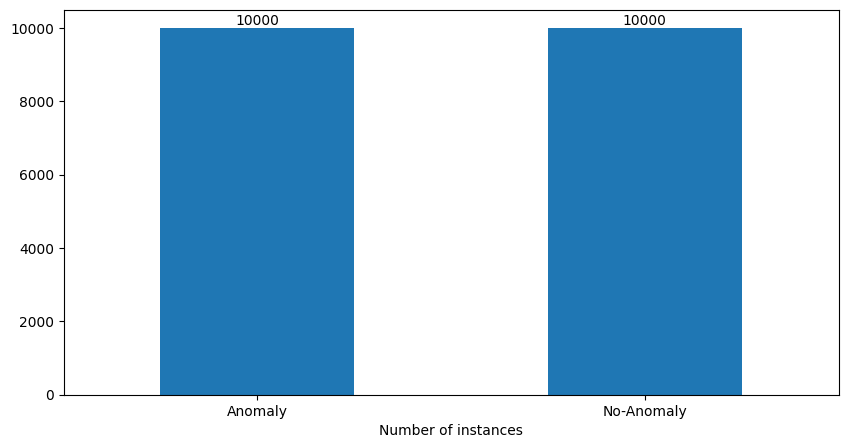

In [6]:
def convert_to_binary(x):
    x = 'Anomaly' if x != 'No-Anomaly' else x
    return x

ax = df.anomaly_class.apply(convert_to_binary).value_counts().plot.bar(figsize=(10,5))
ax.tick_params(labelrotation=0)
ax.bar_label(ax.containers[0])
ax.set_xlabel('Number of instances')
plt.show()

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import numpy as np

In [9]:
sample = df.groupby('anomaly_class').sample()
print(sample)
print(sample.iloc[2, 0])

                                          image_filepath   anomaly_class
6001   D:\Github\Infrared-Solar-Modules-Classifier\Da...            Cell
4380   D:\Github\Infrared-Solar-Modules-Classifier\Da...      Cell-Multi
7893   D:\Github\Infrared-Solar-Modules-Classifier\Da...        Cracking
2080   D:\Github\Infrared-Solar-Modules-Classifier\Da...           Diode
839    D:\Github\Infrared-Solar-Modules-Classifier\Da...     Diode-Multi
6893   D:\Github\Infrared-Solar-Modules-Classifier\Da...        Hot-Spot
7926   D:\Github\Infrared-Solar-Modules-Classifier\Da...  Hot-Spot-Multi
12298  D:\Github\Infrared-Solar-Modules-Classifier\Da...      No-Anomaly
217    D:\Github\Infrared-Solar-Modules-Classifier\Da...  Offline-Module
2742   D:\Github\Infrared-Solar-Modules-Classifier\Da...       Shadowing
8237   D:\Github\Infrared-Solar-Modules-Classifier\Da...         Soiling
8840   D:\Github\Infrared-Solar-Modules-Classifier\Da...      Vegetation
D:\Github\Infrared-Solar-Modules-Classifier\Data/20

In [12]:
image_path= sample.iloc[2, 0]
print(image_path)

D:\Github\Infrared-Solar-Modules-Classifier\Data/2020-02-14_InfraredSolarModules\images/7893.jpg


In [14]:
# Cargar el modelo preentrenado VGG16
vgg16 = VGG16(weights='imagenet')

# Cargar y preprocesar la imagen de entrada
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Obtener las características de la imagen
features = vgg16.predict(x)

# Imprimir las dimensiones de las características extraídas
print(features)

1/1 [==============================] - 0s 172ms/step
[[1.91459731e-05 5.39084082e-04 3.35921563e-04 1.91082887e-04
  6.48310815e-04 2.17161491e-04 9.51201437e-05 3.17291444e-04
  9.75787916e-05 5.25322161e-04 1.04107421e-04 2.72284902e-04
  3.61402577e-04 2.90500640e-04 2.45016709e-04 1.04299259e-04
  2.06111959e-04 1.02512102e-04 5.25316864e-04 1.63080025e-04
  8.91785821e-05 2.67488183e-04 4.38935647e-04 6.28415088e-04
  1.57433868e-04 4.66833662e-05 1.08727261e-04 5.70374832e-05
  1.65146230e-05 3.45436507e-04 2.70033452e-05 2.26071759e-04
  3.06926413e-05 1.51075117e-04 6.88056825e-05 5.99468003e-05
  4.65156016e-04 3.42120293e-05 6.83407779e-05 9.47214357e-05
  1.86457008e-04 3.24058674e-05 9.73888600e-05 3.53781797e-05
  7.94572843e-05 2.03710675e-04 3.51555616e-04 1.74032481e-04
  1.70200641e-04 6.24049353e-05 2.91783130e-04 1.54182475e-04
  3.89271117e-05 5.70992270e-05 5.56657833e-05 1.98878843e-04
  7.53704808e-05 7.94346761e-06 7.48302409e-05 2.49296194e-04
  1.58931784e-04 